In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

follow the barra exposition?

focus on an APT version--describing returns

Do univariate first, estimate for a few firms 

Look at R-squared, residual and correlation with residuals

show that if the residuals are uncorrelated we can reconstruct the covariance matrix

then do multifactors








# Factor models

Let $r_t^i$ be an asset excess return over the risk-free rate

Let $f_t$ be a traded factor, for example the excess returns on the market portfolio

Then we can write

$$r_t^i=b_{i}f_t+u_{i,t}$$

where $b_{i}$ is asset $i$ exposure to the factor

We can always write things that way--it is just a statistical decomposition

1. It can be useful for measuring risk if
    - The risk $u_{i,t}$ is specific to asset $i$ and uncorrelated with other assets 

2. It can be useful for measuring expected returns if
    - The risk $u_{i,t}$ has no premium, i.e., $E[u_{i,t}]=0$
    - The premium of asset $i$ comes exclusively from the exposure to the factor $f$

We will call the first a factor model of risk, and the second a factor model of expected returns

- Which one of the two is the CAPM?
- Which one of the two is the APT?
- Which one of the two is the market model?
- What is the difference between the CAPM and the market model?

## A Single-Factor Risk Model

We now focus on the first case. The assumption that $u_{i,t}$ are uncorrelated across assets is never really satisfied

But it can be achieved approximately

We will see how we can compute covariance matrixes easily under such an assumption

first we will do so using a single factor

In this case the assumption is very bad...and not even close to holding for most assets...but will allow us to get the intuition

We will then learn how to do it with many factors as is standard in the industry

I will add an intercept to make explicit that I am not making any assumption about how the means of the asset and the factor are related



$$r_t^i=a_i+b_{i}f_t+u_{i,t}$$

- $r_t^i$ is the the excess return of asset i over the risk-free rate
- $b_i$ is the exposure or sensitivity of asset $i$ to the factor
- $f_t$ is the excess return of the factor
- non-factor component of the asset return of asset $i$. Assumed to uncorrelated between any two assets

Now this is just a regression!

We have that

$$Var(r_t^i)=b_i^2Var(f_t)+var(u_{i,t})$$


This gives us a nice decomposition of risk

- the risk component that is driven by the common factor
- the asset specific comment


Now if our assumption holds, $cov(u_{i,t},u_{j,t})=0$

Then 

$$Cov(r_t^i,r_t^j)=Cov(a_i+b_{i}f_t+u_{i,t},a_j+b_{j}f_t+u_{j,t})=b_ib_jVar(f_t)$$

And the covariance matrix is simply


$$
\left[\begin{array}{cc}
b_i^2+ var(u_{i,t}) & b_ib_j \\
b_ib_j &  b_j^2 +var(u_{j,t})
\end{array}\right]$$

We see that now for N assets we only need to estimate N factor exposures, N asset specific volatilities , and the factor volatility

>$2N+1$ vs $(N^2-N)/2+N$


That is a huge difference


Suppose we have many assets, all respecting this factor model. Say $R_t$ is the big N by 1 vector of excess return $[r_{1,t},r_{2,t},...]$ for all these assets

$$R_t=bf_t+U_t$$

where $b$ is also a N by 1 vector of exposures $[b_1,b_2,...b_N]$  and $u_t$ is the N by 1 vector of shocks 


Then their variance-covariance matrix is simply


$$Var(R_t)=b @ b' Var(f_t)+ Var(U_t)$$



## Application: Market model


- use the 50 stocks


- Then do multifactor ?


- Discuss how to use such model in risk management. Say if you know your portfolio b, you can quickly figure out what another fund might add to your portfolio in terms of risk

- Do CAPM/APT here?

- Benchmarking and tracking error?



In [11]:
from datetime import datetime

# Create a date parser function that will allow pandas to read the dates in the format we have them
date_parser = lambda x: datetime.strptime(x, "%Y%m")
# our 50 stock returns data

url = "https://raw.githubusercontent.com/amoreira2/Fin418/main/assets/data/Retuns50stocks.csv"

# Use pd.read_csv with the date_parser
df  = pd.read_csv(url, parse_dates=['date'], date_parser=date_parser)
# Set the date column as the index

# first, create the DataFrame
df.set_index("date",inplace=True)
# put the returns in percentage format
df=df/100
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2000-01-01 to 2014-12-01
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTL     180 non-null    float64
 1   T       180 non-null    float64
 2   CSCO    180 non-null    float64
 3   FCX     180 non-null    float64
 4   XL      180 non-null    float64
 5   IVZ     180 non-null    float64
 6   AMT     180 non-null    float64
 7   WHR     180 non-null    float64
 8   IR      180 non-null    float64
 9   WFT     180 non-null    float64
 10  YUM     180 non-null    float64
 11  CVS     180 non-null    float64
 12  GD      180 non-null    float64
 13  TYC     180 non-null    float64
 14  EL      180 non-null    float64
 15  MUR     180 non-null    float64
 16  CTAS    180 non-null    float64
 17  CBSA    180 non-null    float64
 18  SNV     180 non-null    float64
 19  CAM     180 non-null    float64
 20  DLTR    180 non-null    float64
 21  CAH     180 non-null

In [21]:
import statsmodels.api as sm
# add a constant to the independent variable
x= sm.add_constant(df['Market'])
# set the dependent variable to be the 'CTL' return
y= df['CTL']
# run the regression
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTL   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     36.81
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.62e-09
Time:                        18:02:15   Log-Likelihood:                 214.56
No. Observations:                 180   AIC:                            -425.1
Df Residuals:                     178   BIC:                            -418.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.006      0.340      0.734      -0.009       0.013
Market         0.7269      0.120      6.068      0.000       0.491       0.963
==============================================================================
Omnibus:                       43.729   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.038
Skew:                           0.524   Prob(JB):                     2.73e-86
Kurtosis:                      10.172   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:

The coefficient on the market estimates the exposure $b_{CTL}$. It is 0.72 and well estimate

- we see that the standard errors allow us to reject both zero (easy) and one (not as easy simnce the typical stock must have a beta of 1)

We see that the R-squared is 17% so the asset specific risk is sizable

* what fraction of CTL risk is due to the factor?

* how large is the non-factor component?


In [13]:
# to get the residual volatility, we need to get the residuals and compute it's volatility
u= results.resid
print(u.std()*12**0.5)


0.25520301676928053


Lets now estimate the covariance matrix of these 50 stocks using this single-factor model

1. Run regression stock by stock
1. save betas, save residual variance
1. Use formula to construct variance matrix

In [24]:
df.columns[:-1]

Index(['CTL', 'T', 'CSCO', 'FCX', 'XL', 'IVZ', 'AMT', 'WHR', 'IR', 'WFT',
       'YUM', 'CVS', 'GD', 'TYC', 'EL', 'MUR', 'CTAS', 'CBSA', 'SNV', 'CAM',
       'DLTR', 'CAH', 'DTE', 'SSP', 'PSA', 'EXC', 'TKR', 'CMA', 'ORCL', 'MS',
       'RSG', 'ACAS', 'AGN', 'MMM', 'ETFC', 'CAR', 'MDR', 'NOV', 'PCH', 'BAX',
       'JCI', 'SWK', 'DVN', 'TMO', 'PEP', 'LNC', 'EMR', 'MLM', 'CCI', 'NU'],
      dtype='object')

In [48]:
Results=pd.DataFrame(index=df.columns[:-1],columns=['Beta','VarU'],dtype=float)
Factor=df['Market']
Assets=df.drop('Market',axis=1)
x= sm.add_constant(Factor)
for stocki in Assets.columns:
# set the dependent variable to be the 'CTL' return
    y= Assets[stocki]
    # run the regression
    results= sm.OLS(y,x).fit()
    Results.loc[stocki,'Beta']=results.params[1]
    Results.loc[stocki,'VarU']=results.resid.var()

Results

,Beta,VarU
CTL,0.726946,0.005427
T,0.529153,0.004093
CSCO,1.530779,0.006403
FCX,1.569894,0.011742
XL,1.438681,0.011752
IVZ,2.036247,0.004851
AMT,1.352478,0.027122
WHR,1.442238,0.008598
IR,1.461150,0.005901
WFT,1.513599,0.010939


In [78]:
import numpy as np

# Assuming Results is your DataFrame and 'Beta' is your column
beta = Results['Beta'].values
# make sure beta is a column vector (and not di)
beta=beta.reshape(50,1)
# Compute the outer product of the 'Beta' column with itself
beta_matrix = beta @ beta.T
print(beta_matrix)
print(beta_matrix.shape)

# the unsystematic component is a diagonal matrix with the variance of the residuals on the diagonal
CovU=np.diag(Results['VarU'].values)

print(CovU)

print(CovU.shape)

# construct the covariance matrix by adding the systematic and unsystematic components
Cov_F=beta_matrix*Factor.var()+CovU
print(Cov_F)

print(Cov_F.shape)



[[0.52845028 0.38466559 1.11279362 ... 0.63369045 1.21578277 0.32477868]
 [0.38466559 0.28000291 0.81001644 ... 0.46127124 0.88498354 0.23641048]
 [1.11279362 0.81001644 2.34328505 ... 1.334405   2.5601563  0.68390851]
 ...
 [0.63369045 0.46127124 1.334405   ... 0.75988907 1.4579043  0.38945793]
 [1.21578277 0.88498354 2.5601563  ... 1.4579043  2.79709901 0.74720431]
 [0.32477868 0.23641048 0.68390851 ... 0.38945793 0.74720431 0.19960476]]
(50, 50)
[[0.00542738 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00409277 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00640331 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00510028 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01439288 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00218208]]
(50, 50)
[[0.0065499  0.0008171  0.00236376 ... 0.00134607 0.00258253 0.00068989]
 [0.0008171  0.004687

## Minimum-variance investing


* it is mean-variance investing under the assumption that all assets have same expected returns, but uses covariance matrix to minimize risk

 * The idea is that expected returns signals are pure noise so we might as well assume there are no signals and all expected returns are the same
  
 * For example this is behind Minimum volatility investing for example, [https://investor.vanguard.com/mutual-funds/profile/VMVFX]
  
* Assumes all assets have the same expected return

$$Min~ X'Var(R)X~ subject~ to~ \mathbf{1}'X=1$$

The result of this problem is a vector of weights proportional to 

$$W_{minvariance}\propto Var(R)^{-1}\mathbf{1}$$

We then impose the constraint that the weights have to add-up to 1.

$$X_{minvariance}=\frac{Var(R)^{-1}\mathbf{1}}{\mathbf{1}^TVar(R)^{-1}\mathbf{1}}$$

* I use this technique in "hedging-risk factors", a recent academic paper, to construct portfolios with Sharpe-ratios of 0.8 at the yearly horizon, which is very large

> Why this might make sense?

So you see here that the problem is really identical to the mean-variance problem. We simply substituted the vector or Expected returns by a vector of ones.

The end result is that now the solution is the portfolio that minimizes variance while being fully invested as the constraint $\mathbf{1}'W=1$ means $\sum_i^I w_i*1=1$

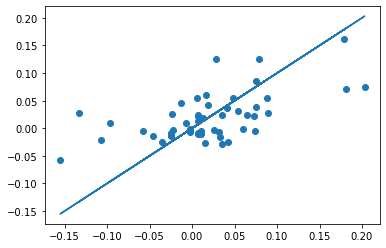

In [82]:
# minimum variance portfolio using the factor-based covariance matrix
ones=np.ones([50,1])
X_minvarFactor=np.linalg.inv(Cov_F)@ ones/(ones.T @np.linalg.inv(Cov_F)@ ones)
# minimum variance portfolio using the unrestricted stock covariance matrix
Cov=Assets.cov()
X_minvar=np.linalg.inv(Cov)@ ones/(ones.T @np.linalg.inv(Cov)@ ones)

# plot the weights against each other
plt.plot(X_minvar,X_minvar)
plt.scatter(X_minvar,X_minvarFactor)



- What do you notice about the weights?
- How do we construct the returns of the strategy?
- What do we need to evaluate performance of the Factor-based approach vs the unrestricted approach?
   - Why can't we simply calculate Sharpe Ratios in the same data?

# Multi-factor models

We simply assumed that the residual $u$ is uncorrelated

This will never be exactly correct, but we better be sure that we are not missing some big sources of correlation 

If we miss our covariance assumption will be off

- Suppose we have a long only portfolio, are we going to over-estimate or under-estimate our true portfolio variance?

- Suppose we have a long-short, that goes long some assets and short others, would the same conclusion apply? why?

- Suppose we choose a portfolio by minimizing variance (like we just did) when are you going to over-estimate the variance of your portfolio?
    - If there is co-movement that you miss?
    - If there is no true c0-movement but you assumed there was co-movement?

Real data are likely to have many factors

- industry factors: tech stocks move all together
- Stocks that have high valuation multiples tends to move together with other high multiple stocks
- Small stocks tend to move with other small firms
- Firms that have been recently investing a lot move with other similar firms
- etc


We deal with this, by simply adding more factors to our model. Say we now have M different factors

$$r_t^i=b_{i,1}f_t^1+b_{i,2}f_t^2+b_{i,3}f_t^3+...+b_{i,M}f_t^M+u_{i,t}+u_{i,t}$$


Where $b_{i,j}$ measures the exposure of asset $i$ to factor $j$

IF we stack these exposures in a M by 1 vector $B_i=[b_{i,1},b_{i,2},...b_{i,M}]$ and the factors in a M by 1 vector $F_t=[f^1_t,f^2_t,...,f^M_t]$ we can write this in matrix notation

$$r_t^i=B_i@F_t+u_{i,t}$$


As before we can also stack the individual returns :

$$R_t=B@F_t+U_t$$

where

-  $R_t$ is a N by 1 vector with the excess returns of the N assets
-  $B$ is N by M matrix where each row has the exposure of an asset with respect to each M factor and each column has the exposures of the different assets with respect to a particular factor 
- $U_t$ as before is a N by 1 vector with the residual risk of each N asset


## Estimating a multi-factor model

Again, this is a very simple regression!

We simply run a multivariate regression for each asset and the coefficients on the different factors is our estimate!

## Application

Lets apply this!

Lets fo a 8 factor model---total overkill for these 50 stocks--

I will get the 3 factors from the Fama-French 3 factor model: Market, size, value

And get 5 industry portfolios





In [106]:
import pandas as pd
import pandas_datareader.data as web

# Define the start and end dates for the data
start_date = '2000-01-01'
end_date = '2023-12-31'

# Get the Fama-French three-factor model data
ff_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start_date, end_date)[0]

# Get the five industry portfolio data
industry_portfolios = web.DataReader('5_Industry_Portfolios', 'famafrench', start_date, end_date)[0]

# Merge the two datasets together
merged_data = pd.merge(ff_factors, industry_portfolios, on='Date')
factors_names=merged_data.columns
merged_data.index = pd.to_datetime(merged_data.index.to_timestamp())
# put the returns in percentage format
merged_data=merged_data/100
#Merge with your df dataset to make sure the dates match
merged_data = pd.merge(merged_data, df.drop(columns=['Market']), left_on='Date',right_index=True,how='right')

# # Split the merged dataset into factors and individual assets
Rf = merged_data[['RF']]
Factors = merged_data[factors_names].drop(columns=['RF'])
Assets = merged_data.drop(columns=factors_names)

# factors
Factors.info()
Assets.info()
Factors

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2000-01-01 to 2014-12-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  180 non-null    float64
 1   SMB     180 non-null    float64
 2   HML     180 non-null    float64
 3   Cnsmr   180 non-null    float64
 4   Manuf   180 non-null    float64
 5   HiTec   180 non-null    float64
 6   Hlth    180 non-null    float64
 7   Other   180 non-null    float64
dtypes: float64(8)
memory usage: 12.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2000-01-01 to 2014-12-01
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTL     180 non-null    float64
 1   T       180 non-null    float64
 2   CSCO    180 non-null    float64
 3   FCX     180 non-null    float64
 4   XL      180 non-null    float64
 5   IVZ     180 non-null    float64
 6   AMT     180 non-null    float64
 7   WHR 

,Mkt-RF,SMB,HML,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,,,,
2000-01-01,-0.0474,0.0577,-0.0188,-0.0792,-0.0493,-0.0489,0.0759,-0.0477
2000-02-01,0.0245,0.2136,-0.0959,-0.0523,-0.0463,0.1322,-0.0275,-0.0738
2000-03-01,0.0520,-0.1720,0.0813,0.1098,0.0813,0.0483,0.0016,0.1439
2000-04-01,-0.0640,-0.0668,0.0726,-0.0221,0.0153,-0.0996,0.0526,-0.0285
2000-05-01,-0.0442,-0.0605,0.0475,-0.0060,0.0125,-0.1076,0.0396,0.0336
...,...,...,...,...,...,...,...,...
2014-08-01,0.0424,0.0040,-0.0045,0.0522,0.0399,0.0336,0.0554,0.0412
2014-09-01,-0.0197,-0.0371,-0.0134,-0.0171,-0.0455,-0.0137,-0.0022,-0.0113
2014-10-01,0.0252,0.0421,-0.0181,0.0297,0.0085,0.0143,0.0590,0.0344


In [107]:
Beta=pd.DataFrame(index=Assets.columns[:-1],columns=Factors.columns,dtype=float)
VarU=pd.DataFrame(index=Assets.columns[:-1],columns=['VarU'],dtype=float)
x= sm.add_constant(Factors)
for stocki in Assets.columns:
    y= Assets[stocki]
    # run the regression
    results= sm.OLS(y,x).fit()
    # store beta parameters skipping the constant
    Beta.loc[stocki,:]=results.params[1:]
    # store the residual variance
    VarU.loc[stocki,'VarU']=results.resid.var()

Beta

,Mkt-RF,SMB,HML,Cnsmr,Manuf,HiTec,Hlth,Other
CTL,1.773661,-0.584068,0.013224,0.591461,-0.151144,-0.368082,0.024628,-0.729825
T,-0.765983,-0.708870,0.519897,0.565646,0.168277,0.789765,0.338093,-0.314557
CSCO,-1.209827,0.063438,0.304196,-0.030400,-0.017300,1.789234,0.132417,0.326659
FCX,0.579567,0.240257,-0.104024,0.384780,1.676865,-0.040493,-0.662841,-0.379800
XL,-2.138662,0.087942,-0.098236,0.743264,0.194891,0.325159,-0.088233,2.389057
IVZ,-2.943381,0.143413,-0.059142,0.369939,0.983337,1.722916,0.600754,1.188089
AMT,-3.074392,0.521988,0.450322,-0.642305,1.219210,2.357371,0.867010,0.144035
WHR,-0.123852,0.510154,1.116104,1.142745,-0.247190,0.323533,0.157214,0.360687
IR,-1.389932,0.025733,0.109128,1.001246,0.943648,0.638801,-0.102587,0.521383
WFT,-2.307030,0.411222,-0.381759,-0.359601,2.801833,0.651049,-0.450652,0.940941


## Reconstructing the co-variance matrix

We have

$$R_t=B@F_t+u_t$$

Then

$$Var(R_t)=B@Var(F_t)@B.T+Var(U_t)$$

The big difference is that now $F$ is a vector of factors


so $Var(F_t)$ is a M by M variance covariance matrix

In [108]:
Var_F=Factors.cov()
Cov_F=Beta @ Var_F @ Beta.T + np.diag(VarU['VarU'].values)
Cov_F

,CTL,T,CSCO,FCX,XL,IVZ,AMT,WHR,IR,WFT,...,JCI,SWK,DVN,TMO,PEP,LNC,EMR,MLM,CCI,NU
CTL,0.006550,0.001408,0.002038,0.002353,0.002344,0.003068,0.001478,0.002345,0.002524,0.002014,...,0.001866,0.001834,0.001465,0.001725,0.000972,0.002767,0.001863,0.001482,0.002324,0.000972
T,0.001408,0.004688,0.001840,0.001529,0.002097,0.002673,0.001342,0.002003,0.002108,0.001364,...,0.001478,0.001464,0.001073,0.001628,0.000898,0.002289,0.001655,0.001333,0.001848,0.000682
CSCO,0.002038,0.001840,0.011381,0.004141,0.003665,0.007108,0.005885,0.004123,0.004269,0.003808,...,0.003918,0.002949,0.001776,0.003202,0.000737,0.004472,0.002989,0.002185,0.006565,0.000827
FCX,0.002353,0.001529,0.004141,0.016977,0.004431,0.006325,0.004123,0.004492,0.005487,0.007251,...,0.004302,0.004351,0.005067,0.002811,0.000827,0.005794,0.003777,0.003399,0.005176,0.001782
XL,0.002344,0.002097,0.003665,0.004431,0.016149,0.006390,0.001929,0.006672,0.005633,0.004734,...,0.005489,0.004780,0.003223,0.002946,0.001755,0.008175,0.004011,0.004223,0.003393,0.001667
IVZ,0.003068,0.002673,0.007108,0.006325,0.006390,0.013659,0.006441,0.006358,0.006517,0.006437,...,0.005675,0.004862,0.004039,0.004611,0.001651,0.007721,0.004788,0.004047,0.007738,0.001823
AMT,0.001478,0.001342,0.005885,0.004123,0.001929,0.006441,0.031007,0.002818,0.003462,0.004313,...,0.002842,0.002246,0.002495,0.003106,0.000404,0.003400,0.002591,0.001729,0.006626,0.000725
WHR,0.002345,0.002003,0.004123,0.004492,0.006672,0.006358,0.002818,0.013016,0.005424,0.004185,...,0.005186,0.004573,0.002741,0.002847,0.001674,0.007106,0.003566,0.003761,0.003953,0.001647
IR,0.002524,0.002108,0.004269,0.005487,0.005633,0.006517,0.003462,0.005424,0.010436,0.005557,...,0.004651,0.004379,0.003777,0.003135,0.001402,0.006352,0.003864,0.003627,0.004728,0.001701
WFT,0.002014,0.001364,0.003808,0.007251,0.004734,0.006437,0.004313,0.004185,0.005557,0.015806,...,0.004336,0.004459,0.006108,0.002894,0.000642,0.006455,0.004048,0.003746,0.005082,0.001747


- If we compare the in-sample Variance of our minimum variance portfolios for
    - The unrestricted case
    - The single-factor covariance
    - The multi-factor covariance

- which one will have lowest variance? What will have the highest?
- Now split the sample in two. Repeat the covariance estimation procedure for each of these approaches for the first half of the sample
- Now use the weights to compute the variance of each of the portfolios in the second half
- Is the order likely to change? Why? Why not?

## Application: How will your portfolio risk change as you add positions


You have portfolio $X_0$ and you want to sell w of your positions to invest in a fund with portfolio $X_1$. How your portfolio variance will change as a function of you reallocation?

- The answer is simple

$$Var(wX_1R_t+(1-w)X_0R_t)-Var(X_0R_t)$$

- But also kind of misleading since you might not have good data to estimate the variance of the new portfolio

- Now if you know each portfolio factor betas,$\beta_0=X_0@B$ and $\beta_1=X_1@B$ , and at least one of this portfolio is large and well diversified, then for small tilts, i.e. $w$ small, we have 


$$\frac{Var(wX_1R_t+(1-w)X_0R_t)-Var(X_0R_t)}{\Delta w} =\beta_1Var(F)\beta_0'$$


- The fact that one is well diversified just means that you can ignore the covariance-terms of the portfolios asset specific risks

- So you see above why a large pool of money when allocating money to an active manager will want to regulate their factor exposure

- funds with similar volatilities will be perceived as very different risks depending on how the exposure of portfolio relates to the exposure of the fund




## Performance Attribution


- We can use factor models to decompose a manager strategy

- What explains their returns? 

- tilts they have?  What kind of stocks they like?


### Application: What does Cathie Wood  Likes ?

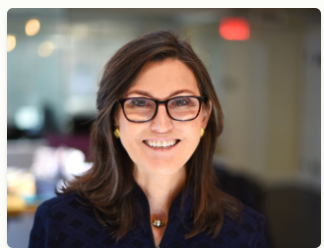

Cathie Wood is a renowned stock-picker and the founder of ARK Invest, which manages around $60 billion in assets and invests in innovative technologies such as self-driving cars and genomics[3][5]. She gained fame for her success in the male-dominated world of investing, her persuasive investment arguments, and her proven track record in the stock market[1]. Prior to founding ARK Invest, she gained experience at The Capital Group, Jennison Associates, and AllianceBernstein, and co-founded Tupelo Capital Management, a hedge fund[5]. Wood is known for her unconventional investment strategies and her advocacy for investing in disruptive technologies, which has garnered her a large following in the investing world[5]. Her estimated net worth is around $250 million[5].

Citations:
[1] https://www.nytimes.com/2021/08/22/business/cathie-wood-ark-stocks.html




In [ ]:
df=pd.read_pickle('../../assets/data/df_WarrenBAndCathieW.pkl')
df.head()

In [14]:
_temp=df.dropna()
# select the columns to use as factors
Factors=_temp.drop(['BRK','RF','ARKK'],axis=1)
Factors.head(3)
ArK=_temp.ARKK-_temp.RF

What are these factors?

* HML is the value strategy that buys high book to market firms and sell low book to market firms

* SMB is a size strategy that buys firms with low market capitalization and sell firms with high market capitalizations

* RmW is the strategy that buys firms with high gross profitability and sell firms with low gross profitability

* CmA is the strategy that buys firms that are investing little (low CAPEX) and sell firms that are investing a lot (high CAPEX) 

* MOM is the momentum strategy that buy stocks that did well in the last 12 months and short the ones that did poorly


We will discuss more later

for now just think of them as important trading strategies that practicioners know

In [15]:

x= sm.add_constant(Factors)
y= ArK
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1069.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:59:39   Log-Likelihood:                 5908.9
No. Observations:                1804   AIC:                        -1.180e+04
Df Residuals:                    1797   BIC:                        -1.177e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.821      0.069   -3.03e-05       0.001
Mkt-RF         1.1736      0.020     58.714      0.000       1.134       1.213
SMB            0.6944      0.037     18.984      0.000       0.623       0.766
HML           -0.6521      0.038    -16.938      0.000      -0.728      -0.577
RMW           -0.9037      0.054    -16.883      0.000      -1.009      -0.799
CMA           -0.5034      0.071     -7.129      0.000      -0.642      -0.365
Mom           -0.0397      0.025     -1.559      0.119      -0.090       0.010
==============================================================================
Omnibus:                       55.310   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.873
Skew:                           0.116   Prob(JB):                     1.04e-28
Kurtosis:                       4.289   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- How much can we explain of ARKK return behavior?

- What kind of stocks CW likes?

- How much of her portfolio variance comes from market exposure alone?

- If you were to construct a replicating portfolio of her fund

- What would be the volatility of your residual risk?

# Tracking portfolios and Tracking error



# Benchmarking


# Factor Models as Models of Expected Returns


So far we had 

$$r_t^i=b_{i,1}f_t^1+b_{i,2}f_t^2+b_{i,3}f_t^3+...+b_{i,M}f_t^M+u_{i,t}$$


- Where we made assumptions about how $u_{i,t}$ was uncorrelated across assets (i.e. across i)

- But we made NO assumption about any risk-premium in $u_{i,t}$, i.e $E[u_{i,t}]$ does not need to be equal to zero

- In fact we added a constant when we estimated the model to keep this parameter free

- A model of expected returns is exactly the opposite

- We will relax the assumption that the $u_{i,t}$ are uncorrelated--they will be free to do whatever, but

- We will impose that they have no risk-premium, i.e. $E[u_{i,t}]=0$ for any asset $i$


- If this restriction is true, when we take expectations in both sides we get

$$E[r_t^i]=\sum_j^M b_{i,j}E[f_t^j]+E[u_{i,t}]=\sum_j^M b_{i,j}E[f_t^j]$$

- Thus the exposures together with the factor risk-premium are all we need to know to know the expected return of a given asset

- It means that if the model is right ( it never is! It is a model!An approximation) All the premium that there is has to be harvested from these factors alone


- It also means that any portfolio that has any risk $\sigma(u_{i,t})>0$ is not mean-variance efficient

- Why? Because this $\sigma(u_{i,t})$ adds vol, but does not add premium so it must have a lower Sharpe ratio than a portfolio that has the same loadings but no idio risk


- It also tell us that a portfolio of the factors spam (meaning you can combine them to obtaim) the maximum Sharpe Ratio portfolio

- Just as before, our model is a linear regression with a very important restriction--the intercept must be zero for the model to be right

## Alpha

for clarity lets focus on the single factor case M=1. Say we run the regression

$$r^i_t=\alpha_i +\beta_{i}f_t +\epsilon_{i,t}$$

- Then this relation predicts that the intercept, the alpha, should be zero

- It is important here that both the test assets and the reference portfolios are all **excess returns**. This makes the test really simple. If you use returns instead the prediction about the intercept will be different because of the risk-free rate

- We refer to these assets on the Left Hand Side of the regression as **Test Assets** and the asset on the right as the **model**, which is the candidate factor model ( that can contain one or many more factors)

- This means that we can use this to test whether a new strategy adds value relative to another strategy (i.e. the model).

- If the model is "right" than we will fail to reject that the alphas are zero, i.e. the relationship between average returns and factor exposures and factor premiums hold.

- Why alpha=0 is so special? Because it tells us that the expected return of any of these assets can be captured by varying the exposure to  the factor with the minimum increase in risk possible

**What adding value means?** It means that the test portfolio can increase the  sharpe ratio of the maximum sharpe ratio portfolio spanned by the factors. So it means that this asset increases the opportunity set of an investor that has access to the factors





**CAPM prediction: Market portfolio is the mean-varaince efficient portfolio**


* The most used reference portfolio is the market portfolio

* So we will do our first alpha test with respect to the market

* The CAPM holds for a set of assets i=1...N if and only if


  $$E[r_{i,t}] =\alpha_i+\beta_{i,MKT} E[r_{t}^{MKT}]$$
  
  with $\alpha_i=0$ for all assets  i=1...N

  Where both $r_{i,t}$ and $r_{t}^{MKT}$ are excess returns
 


* So if you put any other factor= instead of the market excess return, then you are not testing the CAPM. The CAPM is a specific model that predicts that the market is tangency--in fact the model predicts that is the excess return on the total wealth portfolio--so it is really untestable!

It is very important here that is all about expectations, not at all about realized returns. 

Being MVE does **NOT** mean that your realized returns should explain all the other realized returns. The idio risk can be quite large and can even be correlated across assets!

Instead, it means that the betas of the asset with the factor should explain the expected return of the asset.

Of course, stuff happens, so even if your reference portfolio is in fact MVE portfolio under the true distribution, it will not be in any particular sample, so we will use statistics to tell us if the $\alpha$ is different enough from zero.



**Why practitioners care about this? Beating the Model**

 Practicioners use this to see if they can beat the CAPM (or any richer factor model), i.e. **beat the market**. Having an alpha--a postive intercept-- means that you have an average return that is higher than your strategy market risk exposure would predict.


So if you are U of R  endowment, and a big shot hedge fund manager comes and pitch some fund with some large Sharpe ratio---all you should want to know is whether after you adjust for the exposures to the expected return factors that you already know, if this guys still has alpha.

His value added to you is only the alpha--not the entire Sharpe ratio

Why? Because the other stuff you already know how to harvest the premium



## Testing  if $\alpha_i \neq 0$

  - Our test will be agnostic on the direction.
> Can a negative alpha be value enhancing? Is it likely to be value enhancing in the case of a hedge fund pitching the UofR endowment? 

  - After running the regression with a free intercept you do a standard t-test 

  $$t=\frac{\alpha_i }{\sigma(\alpha_i)}$$

* We say

 - if $|t|\geq 1.64$ there is a 10% chance that the factor is MVE
 - if $|t|\geq 1.96$ there is a 5% chance that the factor is MVE
 - if $|t|\geq 2.1$ there is a 2.5% chance that the factor is MVE
 - if $|t|\geq 2.6$ there is a 1% chance that the factor is MVE
 
 
* The Time-series regression asks the following question:
  
> Can I replicate  the average return I get in asset/strategy $i$ by investing in the factor/factors on the right?

 
* It mean that you can do better by investing by adding asset $i$ to your investment mix

> Question: I show that Asset A has alpha with respect to Asset B. Does it mean that an investor should prefer asset A to asset B?

## Application: Does Warren Buffet beats the market?

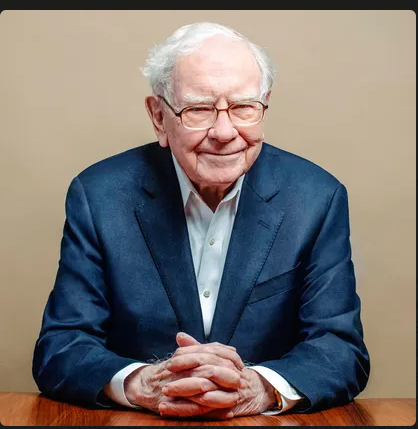

Warren Buffett is the chairman and CEO of Berkshire Hathaway, a multinational conglomerate holding company. Berkshire Hathaway's portfolio includes a diverse range of companies, but its five largest positions are in Apple Inc., Bank of America Corp, Chevron, The Coca-Cola Company, and American Express Company[2]. Buffett is known for his extraordinary performance record and his transparent, straightforward investment model, which involves investing in large, blue-chip companies with strong balance sheets and attractive valuations[2]. His investment strategy focuses on long-term investments and he is recognized for making significant new investments while also being unafraid to drop longtime holdings[2]. As of 2022, Buffett's largest holding was in Apple Inc., representing 41.76% of the equity portfolio, with an estimated gain of 246.02%[4]. Berkshire Hathaway is a leading conglomerate due to Buffett's business savvy and investing, with a high rate of return and a portfolio that continues to attract wide media attention and scrutiny[1][2].



Citations:
[1] https://en.wikipedia.org/wiki/Warren_Buffett
[2] https://www.berkshirehathaway.com


In [8]:
import statsmodels.api as sm
x= sm.add_constant(df['Mkt-RF'])
y= (df.BRK-df.RF)
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     2871.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:40:51   Log-Likelihood:                -13639.
No. Observations:                8338   AIC:                         2.728e+04
Df Residuals:                    8336   BIC:                         2.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0292      0.014      2.142      0.032       0.002       0.056
Mkt-RF         0.6471      0.012     53.579      0.000       0.623       0.671
==============================================================================
Omnibus:                     2301.572   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44382.694
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                      14.178   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* what do we learn? 

* how to think about this alpha? Is it large? 

* Is it large economically?

* is it large statistically?


Now lets use a multi-factor model


**Which Multi-factor model?**


1. Fama French 3 factor model:

$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]+\beta_{i,smb}E[SmB_t]+\beta_{i,HmL}E[HmL_t]$$

2. Carhart 4 factor model:

$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]+\beta_{i,smb}E[SmB_t]+\beta_{i,HmL}E[HmL_t]+\beta_{i,WmL}E[WmL_t]$$

3. Fama French  5 factor model:

$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]+\beta_{i,smb}E[SmB_t]+\beta_{i,HmL}E[HmL_t]+\beta_{i,rmw}E[RmW_t]+\beta_{i,cma}E[CmA_t]$$

4. Fama French  5 factor model + Momentum:

$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]+\beta_{i,smb}E[SmB_t]+\beta_{i,HmL}E[HmL_t]+\beta_{i,rmw}E[RmW_t]+\beta_{i,cma}E[CmA_t]+\beta_{i,WmL}E[WmL_t]$$


These models are more or less on chronological order.

Most practicioners today would start with the 6 factor model and if they are dealing with non equity assets add a bunch of asset class specific factors that essentially mimic some of these factors in these spaces 

In [10]:
temp=df.copy() 
Factors=df.drop(['BRK','RF','ARKK'],axis=1)
x= sm.add_constant(Factors)
y= df.BRK-df.RF
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     570.7
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:42:06   Log-Likelihood:                 24961.
No. Observations:                8338   AIC:                        -4.991e+04
Df Residuals:                    8331   BIC:                        -4.986e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.295      0.022    4.46e-05       0.001
Mkt-RF         0.6296      0.013     47.908      0.000       0.604       0.655
SMB           -0.1003      0.024     -4.236      0.000      -0.147      -0.054
HML            0.4461      0.027     16.835      0.000       0.394       0.498
RMW           -0.1677      0.032     -5.263      0.000      -0.230      -0.105
CMA           -0.0608      0.041     -1.469      0.142      -0.142       0.020
Mom            0.0338      0.017      2.000      0.045       0.001       0.067
==============================================================================
Omnibus:                     2249.754   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45256.687
Skew:                           0.794   Prob(JB):                         0.00
Kurtosis:                      14.302   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* what do we learn now? Did it make any difference? 
* what kind of stocks Warren likes?
* What do we learn about Warren Investment style?
* What do we learn about Warren specific stock picking skills?



## Appraisal Ratios

## Portable Alpha and Hedged Portfolios



## Multi-factor: theory

What about the theory?

### IT is the CAPM, but the wealth portfolio is not the stock market

* According to the  CAPM the Wealth portfolio is the tangency portfolio

* The return on the wealth portfolio summarizes how Bad the times are

* Assets that co-vary more with the market must earn higher returns

* They pay poorly exactly when things are worse

* What is the wealth portfolio? It is the portfolio that holds all assets in proportion to their value

* We often use the equity market as a proxy for this, but that is not the CAPM

* In a way that CAPM is untestable because it is impossible to construct the true wealth portfolio


* The fact that we cannot really measure the returns of the total wealth portfolio gives us a reason to add other facts in additions to the returns to the equity market. Under this logic you add returns to other assets classes>
       
  - Real estate
  - Corporate debt
  - Human capital
  - Private equity
  - Venture Capital
  -...

So you get:

$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]+\sum_a^A\beta_{i,a}E[R^{a}_t-R^f_t]$$

* where $a$ are the different asset classes.

* Sometimes people refer to these other hard to trade assets as "background risks", basically risks that are you are exposed to that are not capture by your financial assets

### ICAPM: Intertemporal Capital Asset Pricing Model
 
* Another way to rationalize additional  factors is to realize that the premium and the volatility of the market are time-varying.

* This means that assets that allow you to hedge this investment opportunity set risk will be valuable

   - For example, an asset that pays well when the market is more/less volatile or one that pays well when the expected returns of market going froward are higher/lower
   
* Under this logic, any strategy that is related to the market moments can also explain average returns on top of the marker beta

* Sometimes people refer to the background risks discussed earlier in this framework as well. But in this case it is not about the moments of the market portfolio per se, but about correlation of the strategy with the background risks investors bear

* The end result is the same

$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]+\sum_{j=1}^J\beta_{i,j}E[Factor^j_t]$$


* but now these are "Factors" and do no need to be components of the total wealth

* but these factors must still be excess returns, i.e. they must be strategies based on financial assets that have price zero

### APT: Arbitrage Pricing Theory


* This is probably the most popular and more flexible way to think about multi-factor models

* but now the factors are motivated because the explain time-series variation in realized return

* the idea is that if you have enough factors you explain enough of the variation in the returns of an asset that if the betas do no explain the average returns than an arbitrage opportunity wouldd open up

* If you have a good enough model of RISK--then by arbitrage --you better have a good model of expected returns!

* Essentially they idea is that if

$$R_t^i-R_t^f=\sum_{j=1}^J\beta_{i,j}Factor^j_t+u_{i,t}$$


where $\sigma(u)$ is small , then 

$$E[R_t^i-R_t^f]\approx\sum_{j=1}^J\beta_{i,j}E[Factor^j_t]$$

* otherwise Sharpe ratio of going long/short the asset and short/long the model would be huge since


$$E[u_{i,t}]=E[R_t^i-R_t^f]-\sum_{j=1}^J\beta_{i,j}E[Factor^j_t]$$






**Three applications to evalauting asset managers**

We will do this in three steps

1. Get time-series of the factors in our factor model and the risk-free rate

2. For each application get the time-series return data of the asset  being evaluated

3. Merge with factor series

4. Convert the returns of the asset being evaluate to excess returns

5. Run a time-series regression of the asset excess returns on the relevant factors

**Factors for our factor model**

* We will start by dowloading he Five factors from Fama Frency 5 factors model plus the momentum factor which is in separate data set

* We of course could have constructed them ourselves as well, but this is obviously faster and less error prone